# Gradient Descent on Linear Regression with Scikit-Learn 
## Batch Gradient Descent
(Play around with the learning rates to see how the convergence rate varies)

[[3.66896992]
 [3.27918211]]


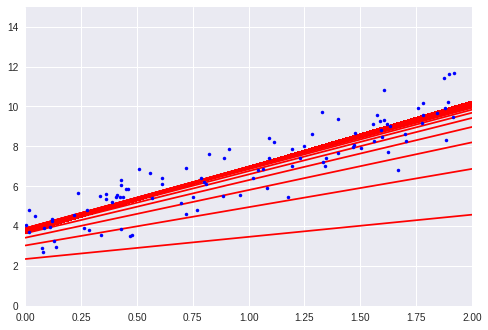

In [23]:
import numpy as np
import matplotlib.pyplot as plt

X = 2* np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]


eta = 0.1 #learning rate 
n_iterations = 1000
m= 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y )
  theta = theta - eta*gradients
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)), X_new]
  y_pred = X_new_b.dot(theta)
  plt.plot(X_new, y_pred, "r-")
  
print(theta)


plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

##Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance unlike Batch Gradient Descent which uses the whole training set to compute the gradient. 

However due to SGD's stochastic (random) behavior the cost function will bounce up and down, decreasing only on average but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal. 



In [0]:
# Below we will implement Stochastic Gradient Descent while gradually decreasing
# the learning rate as the algorithm progresses


